In [ ]:
import pandas as pd
import ast 
import re
import matplotlib.pyplot as plt
from textblob import TextBlob


# Load the dataset
file_path = "C:\Code\Music trends dashboard\dataset.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info(), df.head()

<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
C:\Users\91799\AppData\Local\Temp\ipykernel_20032\3994453693.py:4: SyntaxWarning: invalid escape sequence '\C'
  file_path = "C:\Code\Music trends dashboard\dataset.csv"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

(None,
    Unnamed: 0                track_id                 artists  \
 0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
 1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
 2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
 3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
 4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
 
                                           album_name  \
 0                                             Comedy   
 1                                   Ghost (Acoustic)   
 2                                     To Begin Again   
 3  Crazy Rich Asians (Original Motion Picture Sou...   
 4                                            Hold On   
 
                    track_name  popularity  duration_ms  explicit  \
 0                      Comedy          73       230666     False   
 1            Ghost - Acoustic          55       149610     False   
 2              To Begin Again          57  

In [2]:
# Drop the unnecessary column
df_cleaned = df.drop(columns=["Unnamed: 0"])

# Drop rows with missing values in critical columns (only 1 missing row)
df_cleaned = df_cleaned.dropna(subset=["artists", "album_name", "track_name"])

# Standardize text fields (remove trailing spaces, lowercase for consistency)
df_cleaned["artists"] = df_cleaned["artists"].str.strip()
df_cleaned["album_name"] = df_cleaned["album_name"].str.strip()
df_cleaned["track_name"] = df_cleaned["track_name"].str.strip()
df_cleaned["track_genre"] = df_cleaned["track_genre"].str.lower()

# Display cleaned dataset info
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

In [ ]:

# Load datasets
nodes_path = "artist_nodes.csv"
edges_path = "artist_edges.csv"

df_nodes = pd.read_csv(nodes_path)
df_edges = pd.read_csv(edges_path)

# Inspect Data
print("Nodes Dataset Info:")
print(df_nodes.info(), "\n")
print(df_nodes.head())

print("\nEdges Dataset Info:")
print(df_edges.info(), "\n")
print(df_edges.head())

# Handle missing values
df_nodes = df_nodes.dropna()
df_edges = df_edges.dropna()

# Convert genre strings into actual lists
df_nodes["genres"] = df_nodes["genres"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else [])

# Standardize text formatting
df_nodes["name"] = df_nodes["name"].str.lower().str.strip()
df_edges["id_0"] = df_edges["id_0"].str.lower().str.strip()
df_edges["id_1"] = df_edges["id_1"].str.lower().str.strip()

# Remove duplicate edges
df_edges = df_edges.drop_duplicates()

# Save cleaned files
df_nodes.to_csv("cleaned_artist_nodes.csv", index=False)
df_edges.to_csv("cleaned_artist_edges.csv", index=False)

print("Cleaned artist datasets saved as 'cleaned_artist_nodes.csv' and 'cleaned_artist_edges.csv'.")

Nodes Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156422 entries, 0 to 156421
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   spotify_id  156422 non-null  object 
 1   name        156418 non-null  object 
 2   followers   156418 non-null  float64
 3   popularity  156422 non-null  int64  
 4   genres      156422 non-null  object 
 5   chart_hits  19641 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.2+ MB
None 

               spotify_id                name  followers  popularity  \
0  48WvrUGoijadXXCsGocwM4           Byklubben     1738.0          24   
1  4lDiJcOJ2GLCK6p9q5BgfK            Kontra K  1999676.0          72   
2  652XIvIBNGg3C0KIGEJWit               Maxim    34596.0          36   
3  3dXC1YPbnQPsfHPVkm1ipj  Christopher Martin   249233.0          52   
4  74terC9ol9zMo8rfzhSOiG       Jakob Hellman    21193.0          39   

                                

In [ ]:

# Load dataset
lyrics_path = "song_lyrics.csv"
df_lyrics = pd.read_csv(lyrics_path)

# Inspect data
print("Lyrics Dataset Info:")
print(df_lyrics.info(), "\n")
print(df_lyrics.head())

# Drop rows with missing lyrics
df_lyrics = df_lyrics.dropna(subset=["lyrics"]) 

# Standardize text formatting
df_lyrics["song_name"] = df_lyrics["song_name"].str.lower().str.strip()
df_lyrics["artist"] = df_lyrics["artist"].str.lower().str.strip()
df_lyrics["lyrics"] = df_lyrics["lyrics"].str.lower().str.strip()

# Remove special characters, numbers, and extra spaces from lyrics
df_lyrics["lyrics"] = df_lyrics["lyrics"].apply(lambda x: re.sub(r"[^a-z\s]", "", x))



print("Cleaned lyrics dataset saved as 'cleaned_song_lyrics.csv'.")

Lyrics Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25742 entries, 0 to 25741
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25742 non-null  int64 
 1   link        25742 non-null  object
 2   artist      25742 non-null  object
 3   song_name   25742 non-null  object
 4   lyrics      25742 non-null  object
dtypes: int64(1), object(4)
memory usage: 1005.7+ KB
None 

   Unnamed: 0                                            link  \
0           0  ../lyrics/backstreetboys/climbingthewalls.html   
1           1        ../lyrics/westlife/howtobreakaheart.html   
2           2                 ../lyrics/deanmartin/iwill.html   
3           3   ../lyrics/deanmartin/tellyourmotherhello.html   
4           4        ../lyrics/deanmartin/behonestwithme.html   

                   artist               song_name  \
0  Backstreet Boys Lyrics      Climbing The Walls   
1         Westlife Lyrics    How T

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------------- 624.3/624.3 kB 22.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


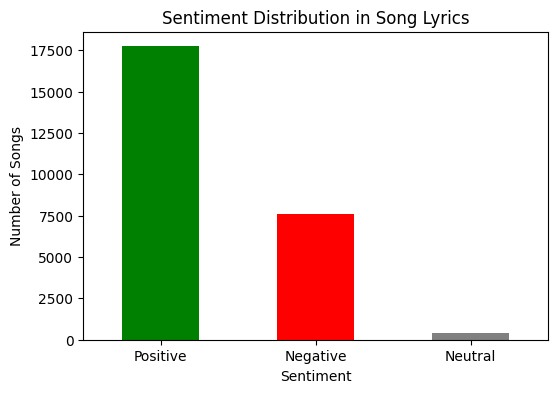

✅ Sentiment analysis completed. Results saved in 'lyrics_with_sentiment.csv'.


In [ ]:

# Load cleaned lyrics dataset
lyrics_path = "cleaned_song_lyrics.csv"  
df_lyrics = pd.read_csv(lyrics_path)

# Define a function to analyze sentiment
def get_sentiment(text):
    analysis = TextBlob(str(text))  # Convert to string (handle NaN cases)
    polarity = analysis.sentiment.polarity  # Sentiment score (-1 to 1)
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to lyrics
df_lyrics["sentiment"] = df_lyrics["lyrics"].apply(get_sentiment)

# Count sentiment distribution
sentiment_counts = df_lyrics["sentiment"].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar", color=["green", "red", "gray"])
plt.title("Sentiment Distribution in Song Lyrics")
plt.xlabel("Sentiment")
plt.ylabel("Number of Songs")
plt.xticks(rotation=0)
plt.show()

# Save the dataset with sentiment labels
df_lyrics.to_csv("lyrics_with_sentiment.csv", index=False)

print("Sentiment analysis completed. Results saved in 'lyrics_with_sentiment.csv'.")

In [ ]:
# Load datasets
lyrics_path = "lyrics_with_sentiment.csv"
artist_nodes_path = "artist_nodes.csv"

df_lyrics = pd.read_csv(lyrics_path)
df_nodes = pd.read_csv(artist_nodes_path)

# Step 1: Standardize artist names for fast merging
df_lyrics["artist"] = df_lyrics["artist"].str.replace(" lyrics", "", regex=False).str.lower().str.strip()
df_nodes["name"] = df_nodes["name"].str.lower().str.strip()

# Step 2: Merge using exact matches (super fast!)
df_final = df_lyrics.merge(df_nodes, left_on="artist", right_on="name", how="left")

# Step 3: Save final dataset
df_final.to_csv("final_corrected_dataset.csv", index=False)

print(" Merge successful! Saved as 'final_corrected_dataset.csv'.")


✅ Merge successful! Saved as 'final_corrected_dataset.csv'.


In [ ]:
# Load the final merged dataset
file_path = "final_corrected_dataset.csv"  # Ensure this file is in the same directory
df = pd.read_csv(file_path)

# Print available columns (debugging)
print("Available columns:", df.columns)

# Define the required columns for Power BI
required_columns = ["artist", "song_name", "sentiment", "followers", "popularity", "genres", "collaborator_id"]

# Keep only the columns that exist in the dataset
existing_columns = [col for col in required_columns if col in df.columns]
df_powerbi = df[existing_columns]

# Rename columns for better readability in Power BI
df_powerbi.rename(columns={
    "artist": "Artist",
    "song_name": "Song",
    "sentiment": "Sentiment",
    "followers": "Followers",
    "popularity": "Popularity",
    "genres": "Genre",
    "collaborator_id": "Collaborator"
}, inplace=True)

# Save the dataset for Power BI
pbix_file_path = "powerbi_dataset.csv"
df_powerbi.to_csv(pbix_file_path, index=False)

print(" Power BI dataset created! Saved as 'powerbi_dataset.csv'.")


Available columns: Index(['Unnamed: 0', 'link', 'artist', 'song_name', 'lyrics', 'sentiment',
       'spotify_id', 'name', 'followers', 'popularity', 'genres',
       'chart_hits'],
      dtype='object')
✅ Power BI dataset created! Saved as 'powerbi_dataset.csv'.


C:\Users\91799\AppData\Local\Temp\ipykernel_39092\1936855625.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_powerbi.rename(columns={
